In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
path =  os.getcwd() + '/'

In [3]:
df= pd.read_csv(path+'Trees_CRTI.csv')

### This dataset cantains 41 species from 26 Genus

In [4]:
len(df.GENUSSPECI.unique())

41

In [5]:
len(df.GENUS.unique())

26

### 6267 total tree records in this dataset

In [6]:
len(df)

6267

In [7]:
df.columns

Index([u'OBJECTID', u'DATASOURCE', u'INVENTORYT', u'DATATYPE', u'Latitude',
       u'Longitude', u'LANDUSE', u'STREETTREE', u'Year_', u'SITE', u'Plot',
       u'TreeID', u'GENUS', u'Species', u'GENUSSPECI', u'COMMONNAME',
       u'DBH_cm', u'DBH_IN', u'BA', u'HEALTHWORD', u'HEALTHNUM'],
      dtype='object')

In [8]:
col_keep = ['Latitude','Longitude','GENUS','Species','GENUSSPECI','COMMONNAME','DBH_cm','BA']
df_tree = df[col_keep]
df_tree.head()

,Latitude,Longitude,GENUS,Species,GENUSSPECI,COMMONNAME,DBH_cm,BA
0,42.120087,-87.995071,Abies,concolor,Abies concolor,White fir,20.32,0.032429
1,42.120376,-87.995612,Abies,concolor,Abies concolor,White fir,60.96,0.291864
2,42.120192,-87.995067,Abies,concolor,Abies concolor,White fir,50.80,0.202683
3,42.120380,-87.994971,Abies,concolor,Abies concolor,White fir,50.80,0.202683
4,42.094483,-87.991321,Acer,freemanii,Acer freemanii,Freeman maple,76.20,0.456038


In [9]:
S_median=df_tree.groupby(['COMMONNAME']).median()

In [10]:
S_median.to_csv("S_median.csv")

In [11]:
S_mean=df_tree.groupby(['COMMONNAME']).mean()

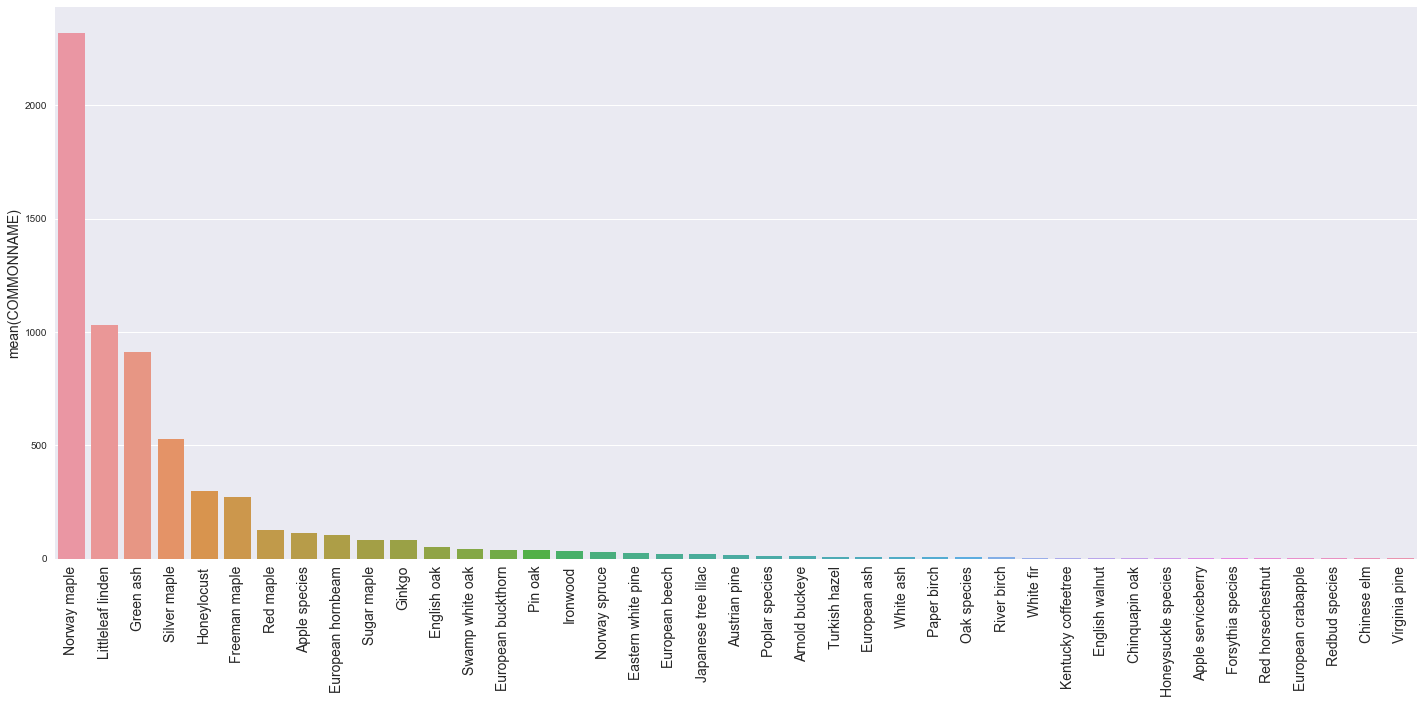

In [75]:
rc={'font.size': 14, 'axes.labelsize': 14, 'legend.fontsize': 14, 
    'axes.titlesize': 14, 'xtick.labelsize': 14}
sns.set(rc=rc)
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
# g = sns.countplot(x='SimpleName', data=df)
g =sns.barplot(x=df_tree.COMMONNAME.value_counts().index, y=df_tree.COMMONNAME.value_counts())
for label in ax.get_xticklabels():
    label.set_rotation(90)
plt.tight_layout()
plt.savefig("CommonSpecies_counts.png")

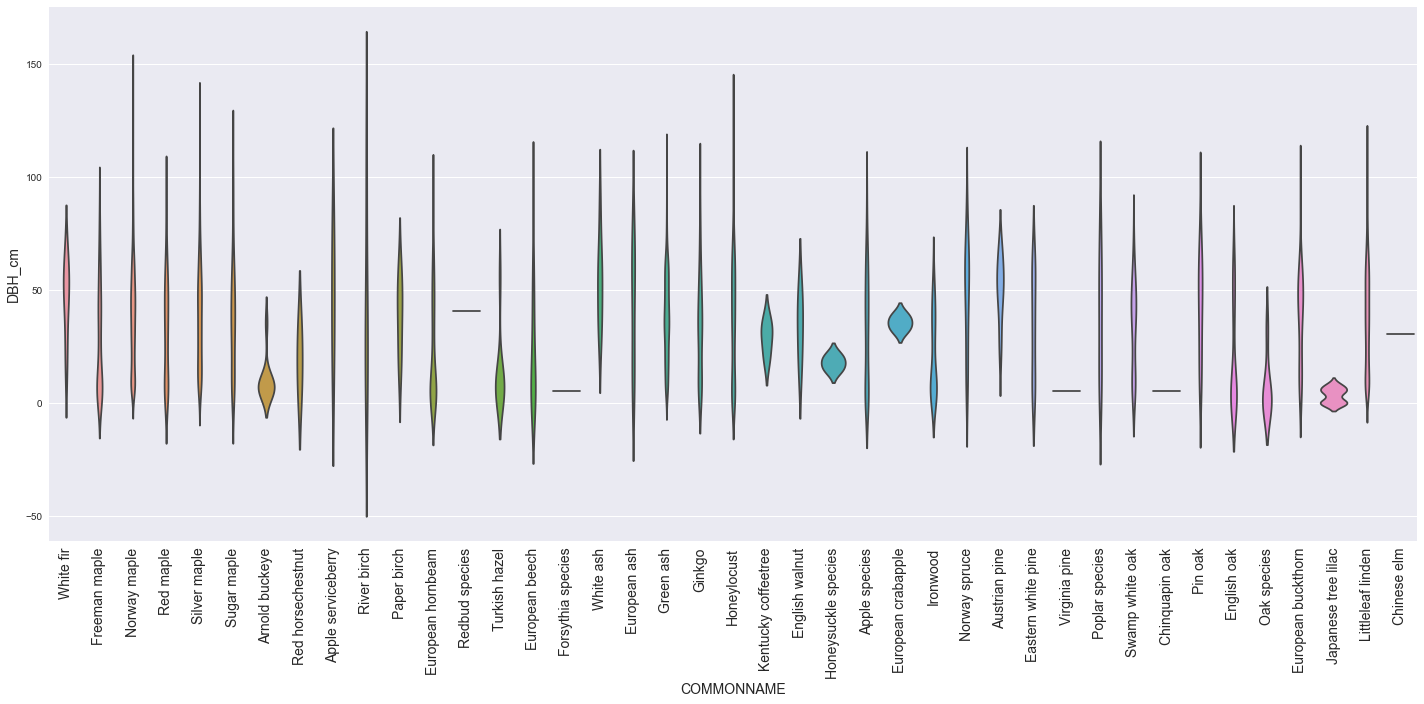

In [79]:
rc={'font.size': 14, 'axes.labelsize': 14, 'legend.fontsize': 14, 
    'axes.titlesize': 14, 'xtick.labelsize': 14}
sns.set(rc=rc)
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
# g = sns.countplot(x='SimpleName', data=df)
g =sns.violinplot(x="COMMONNAME", y="DBH_cm", data=df_tree, inner=None)
for label in ax.get_xticklabels():
    label.set_rotation(90)
plt.tight_layout()
plt.savefig("DBH.png")

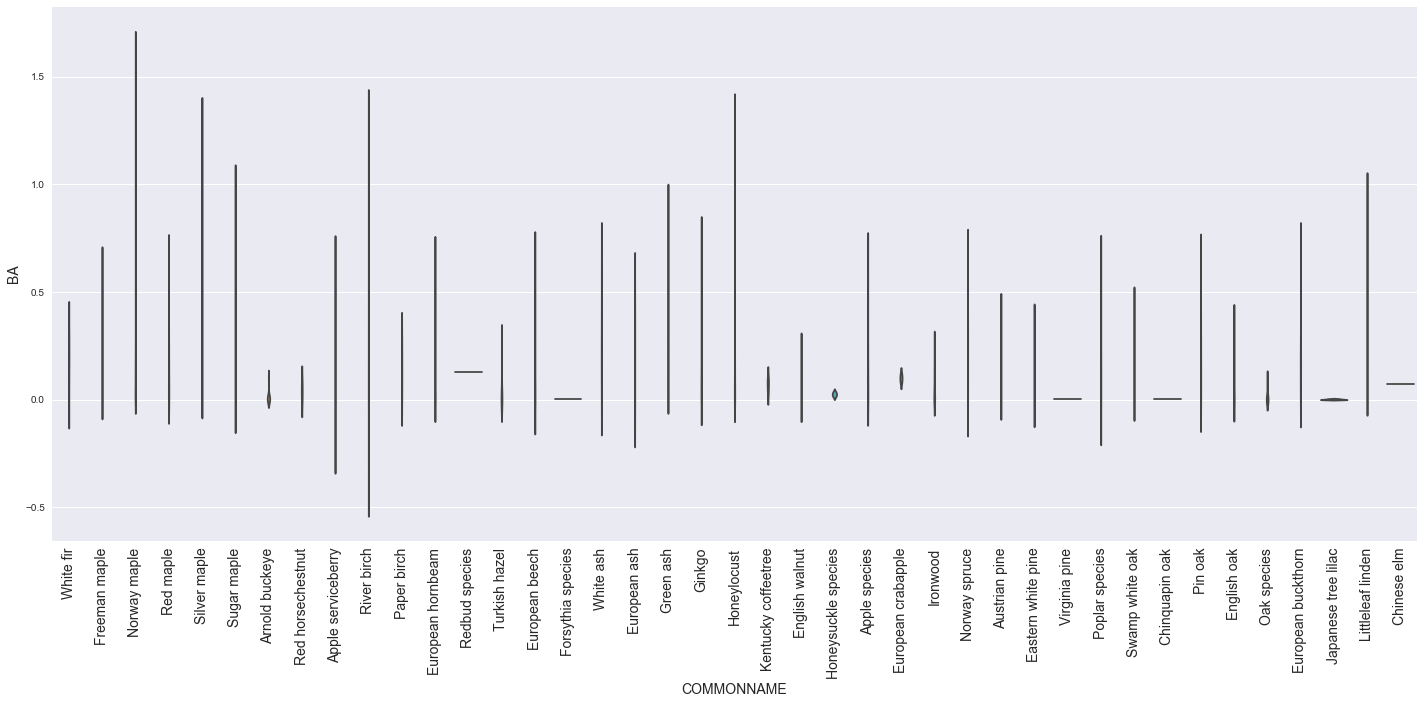

In [77]:
rc={'font.size': 14, 'axes.labelsize': 14, 'legend.fontsize': 14, 
    'axes.titlesize': 14, 'xtick.labelsize': 14}
sns.set(rc=rc)
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
# g = sns.countplot(x='SimpleName', data=df)
g =sns.violinplot(x="COMMONNAME", y="BA", data=df_tree, inner=None)
for label in ax.get_xticklabels():
    label.set_rotation(90)
plt.tight_layout()
plt.savefig("BA.png")

In [15]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd
import math

In [16]:
S_median= pd.read_csv(path+'S_median.csv')

In [17]:
S_median

,COMMONNAME,Latitude,Longitude,DBH_cm,BA
0,Apple serviceberry,42.094416,-88.000090,46.990,0.210031
1,Apple species,42.094135,-88.001114,33.020,0.085634
2,Arnold buckeye,42.085120,-87.998459,7.620,0.004560
3,Austrian pine,42.091994,-88.002954,53.340,0.223459
4,Chinese elm,42.092713,-87.996339,30.480,0.072966
5,Chinquapin oak,42.101722,-87.999581,5.080,0.002027
6,Eastern white pine,42.091522,-87.998433,34.290,0.092474
7,English oak,42.093113,-87.997513,6.985,0.003864
8,English walnut,42.094965,-87.995122,35.560,0.099315
9,European ash,42.094249,-87.995127,50.800,0.207244


In [58]:
hover_text = []
bubble_size = []

In [59]:
S_median.BA.max()

0.26804888300000002

In [61]:
for index, row in S_median.iterrows():
    hover_text.append(('COMMONNAME: {COMMONNAME}<br>'+
                      'Tree DBH: {DBH_cm}').format(COMMONNAME=row['COMMONNAME'],
                                            DBH_cm=row['DBH_cm']))
    bubble_size.append(math.sqrt(row['DBH_cm']))

In [67]:
S_median['text'] = hover_text
S_median['size'] = bubble_size

trace0 = go.Scatter(
    x=S_median['COMMONNAME'],
    y=S_median['DBH_cm'],
    mode='markers',
    text=S_median['text'][S_median['COMMONNAME']],
    marker=dict(
        symbol='circle',
        color='rgb(16, 32, 77)',
        sizemode='diameter',
        sizeref=30,
        size=S_median['size'][S_median['BA']],
        line=dict(
            width=2
        ),
    )
)

In [68]:
data = [trace0]

In [70]:
py.sign_in('geospatialanalystyi', 'nb2qZqfQtQNXXTtefvs2')

layout = go.Layout(
    title='',
    xaxis=dict(
        title='',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=9,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Tree median DBH in cm',
        gridcolor='rgb(255, 255, 255)',
        range=[0, 60],
        zerolinewidth=3,
        ticklen=5,
        gridwidth=2,
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='life-expectancy-per-GDP-2007')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~geospatialanalystyi/0 or inside your plot.ly account where it is named 'life-expectancy-per-GDP-2007'
